In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io, filters
import cv2
from concurrent.futures import ThreadPoolExecutor
from skimage import filters
from scipy import ndimage
import napari

from imd import core

In [4]:
# Load Images, muti-TIFF files

folder_path = 'data2/'

cfp = core.create_stack_from_folder(folder_path, pattern='*CFP*.tif')
fret = core.create_stack_from_folder(folder_path, pattern='*FRET*.tif')

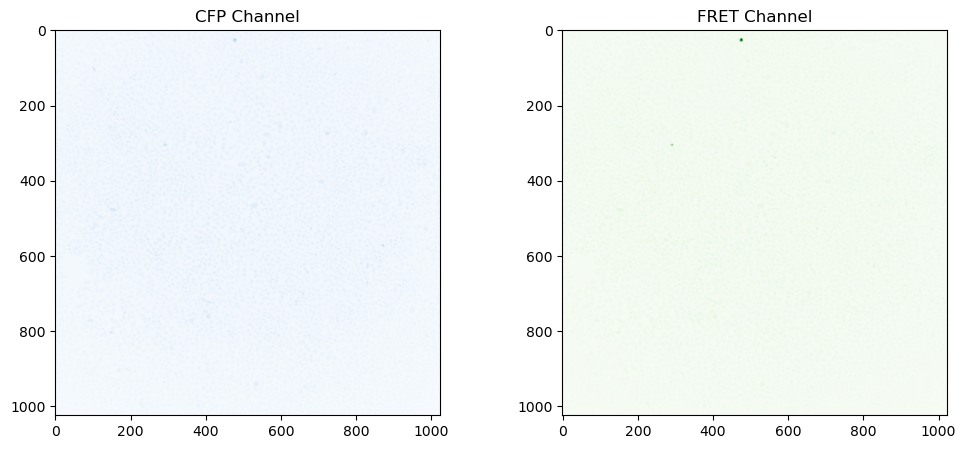

Image Size: CFP=(1024, 1024), FRET=(1024, 1024)
Frame: CFP=29, FRET=29


In [5]:
# Check images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(cfp[0], cmap='Blues')
ax1.set_title('CFP Channel')
ax2.imshow(fret[0], cmap='Greens')
ax2.set_title('FRET Channel')
plt.show()

print(f"Image Size: CFP={cfp[0].shape}, FRET={fret[0].shape}")
print(f"Frame: CFP={len(cfp)}, FRET={len(fret)}")

# Check the consistency in frame number
if len(cfp) != len(fret):
    print("Alert: Frame numbers are not same between two files")

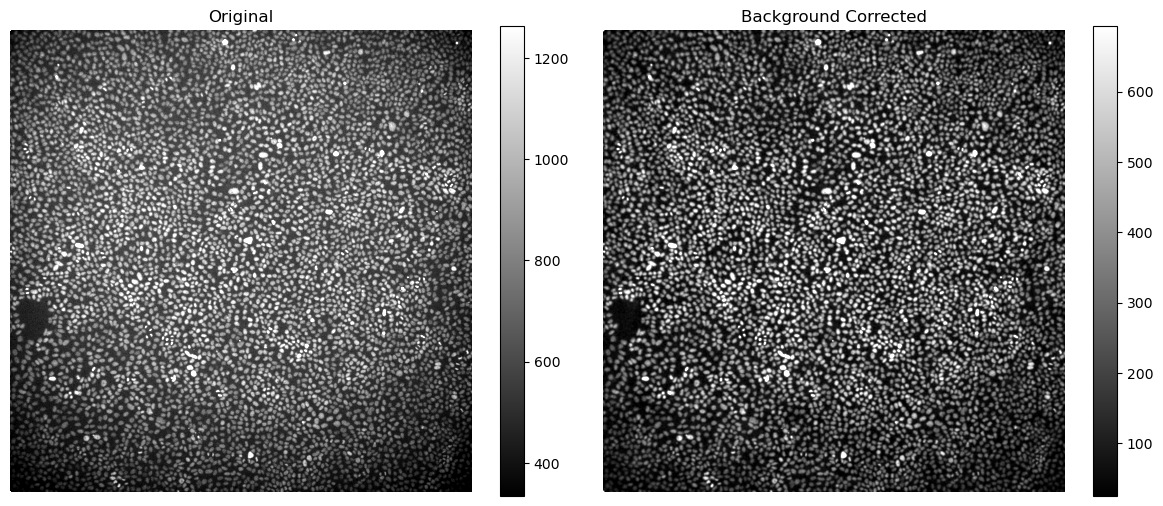

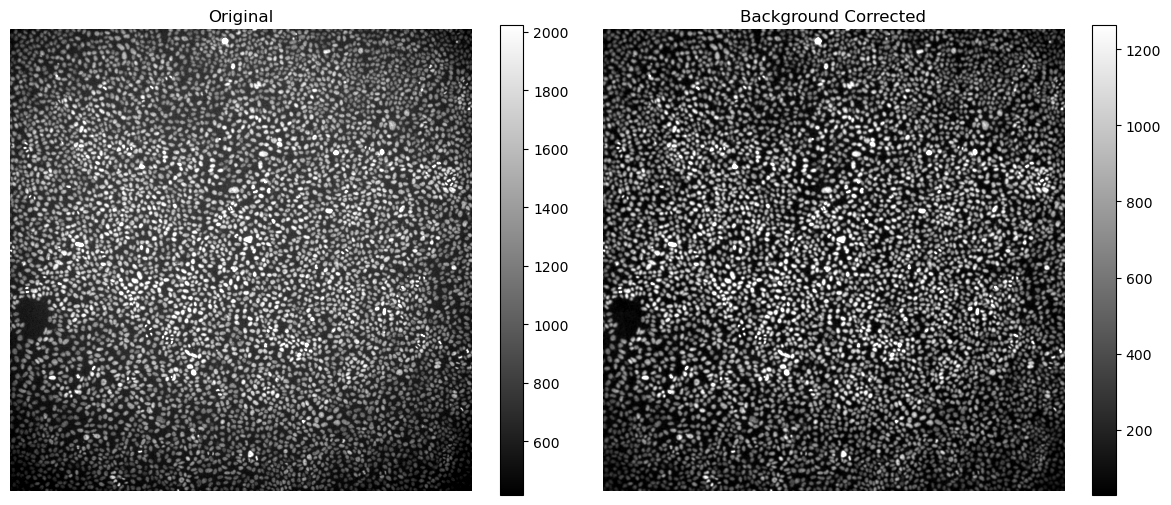

In [6]:
# Background subtraction
# scale_factor should be 1.0 if you want avoid artifcat. For large size images, scale_factor should be decreased.
cfp_corrected = core.rolling_ball_background_correction_fast_with_options(cfp, radius=50, scale_factor=0.5, use_gpu=False)
cfp_corrected += 1 # Offset for denominator

fret_corrected = core.rolling_ball_background_correction_fast_with_options(fret,radius=50,scale_factor=0.5,use_gpu=False)

# Check the result of background subtraction
core.compare_background_correction(cfp, cfp_corrected, frame_idx=0)
core.compare_background_correction(fret, fret_corrected, frame_idx=0)

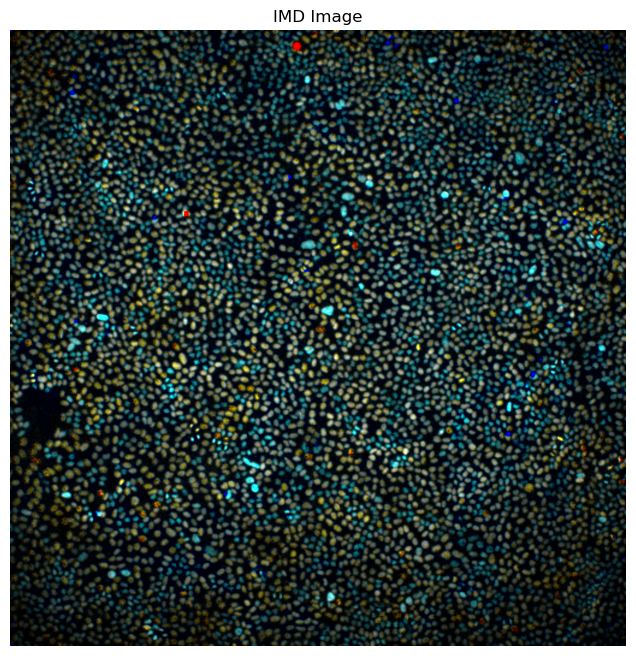

In [11]:
# Creare IMD
imd = core.create_imd(cfp_corrected, fret_corrected, rmax=2.4, rmin=1.2, dmax=1000, dmin=10)

# Check the IMD image
plt.figure(figsize=(8, 8))
plt.imshow(imd[0])
plt.title('IMD Image')
plt.axis('off')
plt.show()

In [12]:
# View the image in napari
viewer = core.view_imd_with_napari(imd, cfp_corrected, fret_corrected)